## ENPM673 – Perception for Autonomous Robots
#### Homework 1 Problem 2
#### Standard Least Squares to fit curves to the given videos

##### Part 1 Plot the graphs

In [1]:
import matplotlib.pyplot as plot
import  csv

# Variables to store x and y coordinates
ball_x1 = []
ball_x2 = []
ball_y1 = []
ball_y2 = []

## Video 1

In [2]:
with open('output1.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        ball_x1.append(float(row[0]))
        ball_y1.append(float(row[1]))

##### Plot graph for video 1

Text(0.5, 1.0, 'Data 1')

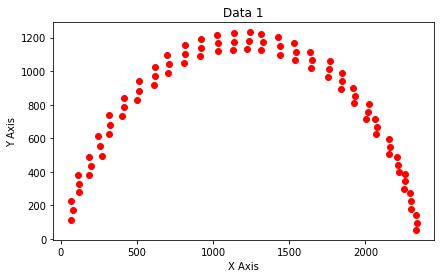

In [3]:
fig1 = plot.figure(figsize=(15,4))
plot.subplot(121)
plot.xlabel('X Axis')
plot.ylabel('Y Axis')
plot.scatter(ball_x1,ball_y1,c='red')
plot.title('Data 1')

## Video 2

##### Read data from CSV

In [4]:
with open('output2.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        ball_x2.append(float(row[0]))
        ball_y2.append(float(row[1]))

##### Plot graph for Video 2

Text(0.5, 1.0, 'Data 1')

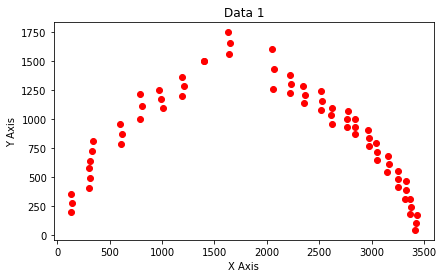

In [5]:
fig2 = plot.figure(figsize=(15,4))
plot.subplot(121)
plot.xlabel('X Axis')
plot.ylabel('Y Axis')
plot.scatter(ball_x2,ball_y2,c='red')
plot.title('Data 1')

##### Equation of parabola:
```math
y = a + bx + c*x^2
```
##### To find the constants using least square, we need to solve the following three equations for three unknowns:

$\sum{y} = na + b\sum{x} + c\sum{x^2}$
<br>
$\sum{xy} = a\sum{x} + b\sum{x^2} + c\sum{x^3}$
<br>
$\sum{x^{2}y} = a\sum{x^2} + b\sum{x^3} + c\sum{x^4}$
<br>

##### Calculating the variables:

$\sum{y}$
$\sum{x}$
$\sum{x^2}$
$\sum{xy}$
$\sum{x^3}$
$\sum{x^{2}y}$
$\sum{x^4}$

In [6]:
s_y = 0.0
s_x = 0.0
s_x2 = 0.0
s_xy = 0.0
s_x3 = 0.0
s_x2y = 0.0
s_x4 = 0.0
n = 0.0

In [7]:
for i in range(len(ball_x1)):
    n+=1
    s_y += ball_y1[i]
    s_x += ball_x1[i]
    s_x2 += (ball_x1[i]*ball_x1[i])
    s_x3 += (ball_x1[i]*ball_x1[i]*ball_x1[i])
    s_x4 += (ball_x1[i]*ball_x1[i]*ball_x1[i]*ball_x1[i])
    s_xy += (ball_x1[i]*ball_y1[i])
    s_x2y += (ball_x1[i]*ball_x1[i]*ball_y1[i])

print(n,s_y,s_x,s_x2,s_xy,s_x3,s_x2y,s_x4)


84.0 66080.0 105361.0 178950589.0 80907824.0 338799846259.0 123591919260.0 676503170071681.0


#### Solve the simultaneous equation for three variables

$60112.0 = 68.0 a + 140585.0 b + 372458121.0 c$
<br>
$117137920.0 = 140585.0 a + 372458121.0 b + 1069448089739.0 c$
<br>
$279287933398.0 = 372458121.0 a + 1069448089739.0 b + 3189186156295245.0 c$
<br>


## Curve fitting for video1:

In [8]:
import numpy as np

a = [[n,s_x,s_x2],[s_x,s_x2,s_x3],[s_x2,s_x3,s_x4]]
b = [s_y,s_xy,s_x2y]
c =  np.linalg.solve(a, b)

c

array([ 1.13130702e+02,  1.85756559e+00, -7.77521594e-04])

Text(0.5, 1.0, 'Video 1')

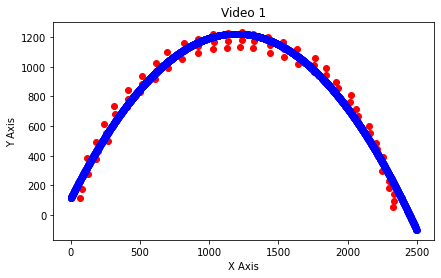

In [9]:
fig = plot.figure(figsize=(15,4))
plot.subplot(121)
plot.xlabel('X Axis')
plot.ylabel('Y Axis')
plot.scatter(ball_x1,ball_y1,c='red')
plot.title('Video 1')

# Create the vectors X and Y
x = np.array(range(2500))
y = (c[0]) + (c[1]*x) + (c[2]*x*x)


plot.scatter(x,y,c='blue')
plot.title('Video 1')

## Curve fitting for video2

In [10]:
s_y = 0.0
s_x = 0.0
s_x2 = 0.0
s_xy = 0.0
s_x3 = 0.0
s_x2y = 0.0
s_x4 = 0.0
n = 0.0
for i in range(len(ball_x2)):
    n+=1
    s_y += ball_y2[i]
    s_x += ball_x2[i]
    s_x2 += (ball_x2[i]*ball_x2[i])
    s_x3 += (ball_x2[i]*ball_x2[i]*ball_x2[i])
    s_x4 += (ball_x2[i]*ball_x2[i]*ball_x2[i]*ball_x2[i])
    s_xy += (ball_x2[i]*ball_y2[i])
    s_x2y += (ball_x2[i]*ball_x2[i]*ball_y2[i])

print(n,s_y,s_x,s_x2,s_xy,s_x3,s_x2y,s_x4)
a = [[n,s_x,s_x2],[s_x,s_x2,s_x3],[s_x2,s_x3,s_x4]]
b = [s_y,s_xy,s_x2y]
c =  np.linalg.solve(a, b)

c

68.0 60112.0 140585.0 372458121.0 117137920.0 1069448089739.0 279287933398.0 3189186156295245.0


array([ 1.29167462e+02,  1.55100315e+00, -4.47618552e-04])

Text(0.5, 1.0, 'Video 2')

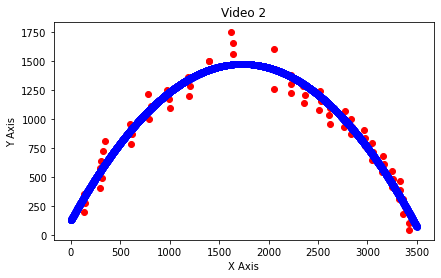

In [11]:
fig2 = plot.figure(figsize=(15,4))
plot.subplot(121)
plot.xlabel('X Axis')
plot.ylabel('Y Axis')
plot.scatter(ball_x2,ball_y2,c='red')
plot.title('Video 2')

# Create the vectors X and Y
x = np.array(range(3500))
y = (c[0]) + (c[1]*x) + (c[2]*x*x)


plot.scatter(x,y,c='blue')
plot.title('Video 2')